In [17]:
import numpy as np
import matplotlib.pylab as plt

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from solver_python import * 
from graphmodel import drawgraph

In [34]:
# ==================
#  Define the model
# ==================

# Nodes: list of tuples [(name, mass, T0) , ...]
# Sources: Dict {name: array (nbr time step), ...}
# Internal links: list ot tuples [(node A, node B, conductance value), ...]
# External links (i.e. with a source):
# list ot tuples [(internal node, source name, conductance value), ...]
# use conductance=None if it is a direct heat source

nodes = [('int',  0.5,  0.2), 
         ('wall', 1.0,  0.1)]

time    = np.linspace(0, 100, 456)
sources = {'ext':np.sin(time)}

internal_links = [('int', 'wall', .7), ]
external_links = [('int', 'ext', 2.0), ]

dt = .1

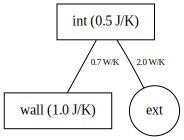

In [35]:
drawgraph(nodes,
          internal_links,
          external_links,
          sources)

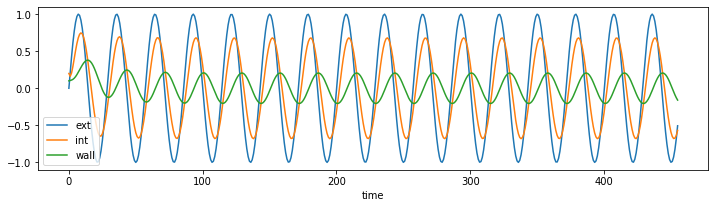

In [36]:
T = solve_model_noOptim(nodes,
                internal_links,
                external_links,
                sources,
                dt)

plt.figure(figsize=(12, 3))
plt.plot(sources['ext'], label='ext')

for k, (name, _, _) in enumerate(nodes):
    plt.plot(T[k, :], label=name)
    
plt.legend(); plt.xlabel('time');

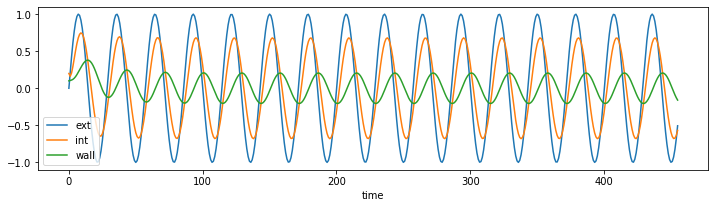

In [37]:
T = solve_model(nodes,
                internal_links,
                external_links,
                sources,
                dt)

plt.figure(figsize=(12, 3))
plt.plot(sources['ext'], label='ext')

for k, (name, _, _) in enumerate(nodes):
    plt.plot(T[k, :], label=name)
    
plt.legend(); plt.xlabel('time');

In [38]:
%%timeit
T = solve_model(nodes,
                internal_links,
                external_links,
                sources,
                dt)

207 µs ± 7.47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
%%timeit
T = solve_model_noOptim(nodes,
                internal_links,
                external_links,
                sources,
                dt)

5.12 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
%%timeit
A, B =   assemble(nodes,
                internal_links,
                external_links,
                sources)

32.3 µs ± 299 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
